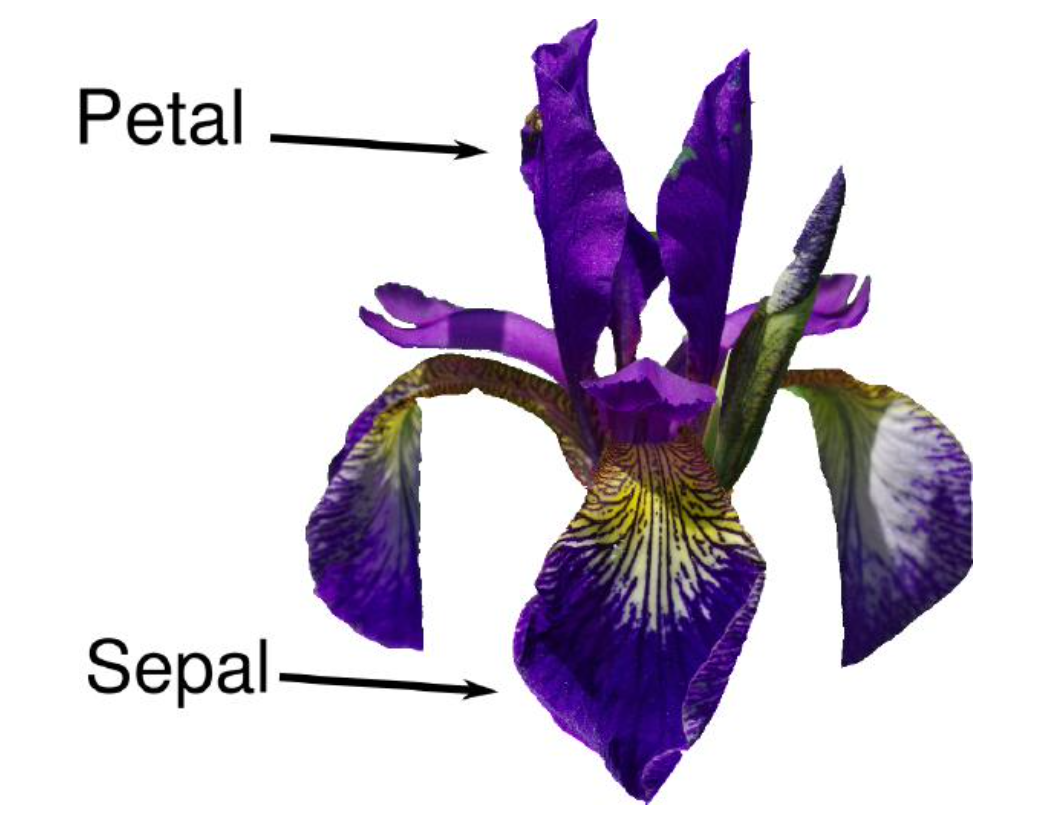

# Iris Flower Classification Machine Learning

In [3]:
# pip install scikit-learn

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
import warnings
warnings.simplefilter("ignore")

iris_df = pd.read_csv("iris.csv")
iris_df.sample(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
70,5.9,3.2,4.8,1.8,Versicolor
90,5.5,2.6,4.4,1.2,Versicolor
87,6.3,2.3,4.4,1.3,Versicolor


In [5]:
iris_df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [7]:
iris_df['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [8]:
iris_df.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

## Define Features

In [9]:
features = ['sepal.length','sepal.width','petal.length','petal.width']

## Visualize the features and target (variety)

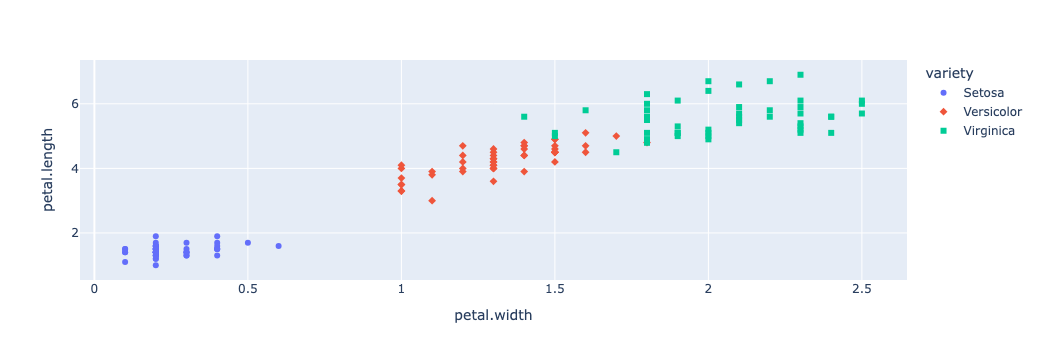

In [10]:
fig = px.scatter(iris_df, x="petal.width", y="petal.length", 
                 color="variety", symbol="variety")
fig.show()

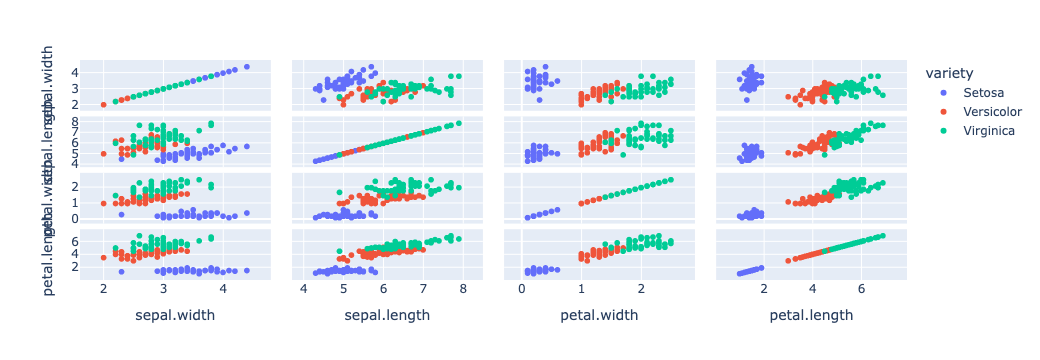

In [11]:
fig = px.scatter_matrix(iris_df, dimensions=["sepal.width", "sepal.length", 
                            "petal.width", "petal.length"], color="variety")
fig.show()

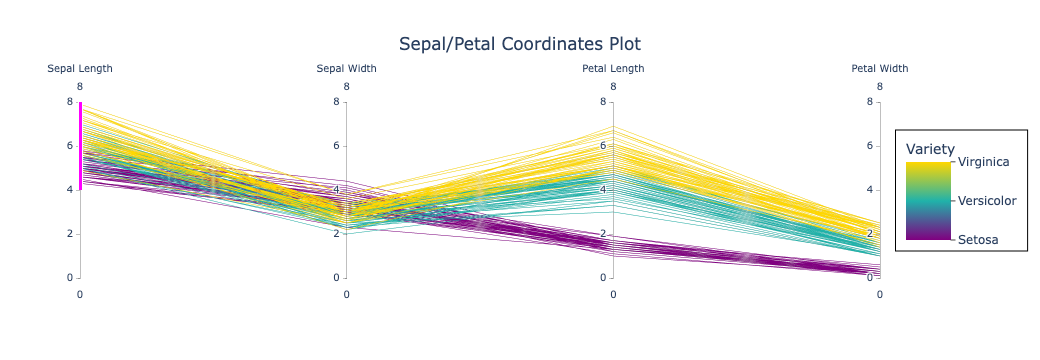

In [12]:
fig = go.Figure(data = go.Parcoords(
    line = dict(color=iris_df.variety.astype('category').cat.codes,
               colorscale = [[0,'purple'],[0.5,'lightseagreen'],[1,'gold']],
               colorbar=dict(title='Variety', thickness=45,
                              tickvals=[0,1,2], ticktext=['Setosa', 'Versicolor', 'Virginica'],
                              lenmode='pixels', len=120, bordercolor='#000', borderwidth=1,
                              ticks='outside'), ),
    dimensions = list([
        dict(range = [0,8],
            constraintrange = [4,8],
            label = 'Sepal Length', values = iris_df['sepal.length']),
        dict(range = [0,8],
            label = 'Sepal Width', values = iris_df['sepal.width']),
        dict(range = [0,8],
            label = 'Petal Length', values = iris_df['petal.length']),
        dict(range = [0,8],
            label = 'Petal Width', values = iris_df['petal.width'])
                    ]),
                )
            )
fig.update_layout(plot_bgcolor = 'white', paper_bgcolor = 'white', 
                  title_text='Sepal/Petal Coordinates Plot', title_x=0.5
)

fig.show()

# Training and Testing Data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
        iris_df[features], iris_df['variety'], random_state=0)

the train_test_split function is X_train, X_test, y_train, and y_test, which are all NumPy arrays. X_train contains 75% of the rows of the dataset, and X_test contains the remaining 25%:

In [14]:
print("X_train shape: {}".format(X_train.shape)) 
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


## Building Your First Model: k-Nearest Neighbors

In [15]:
# Train the model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [16]:
# Accuracy Score (Max: 1)
knn.score(X_test, y_test)

0.9736842105263158

# Making Predictions (Classify an unknow species)

In [17]:
X_new = pd.DataFrame(np.array([[5, 2.9, 1, 0.2]]), columns=features )
X_new

,sepal.length,sepal.width,petal.length,petal.width
0,5.0,2.9,1.0,0.2


In [18]:
print("This is a",knn.predict(X_new)[0])

This is a Setosa
